In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df1 = df.drop(['petal length (cm)', 'petal width (cm)'], axis = 'columns')
df1

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0, 0.5, 'Sepal width')

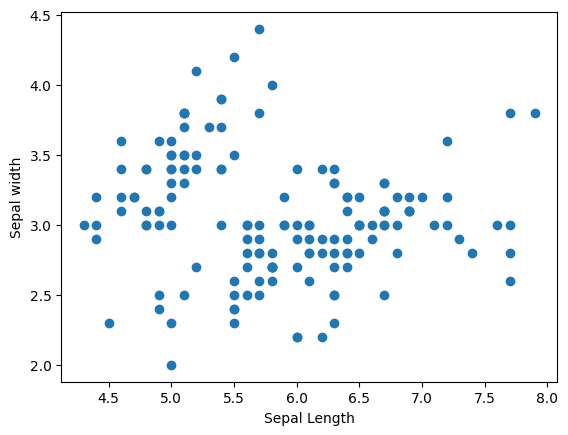

In [12]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')

In [20]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df1)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [23]:
df1['predict'] = y_pred
df1

,sepal length (cm),sepal width (cm),predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


In [25]:
d0 = df1[df1['predict'] == 0]
d1 = df1[df1['predict'] == 1]
d2 = df1[df1['predict'] == 2]

In [27]:
centers = km.cluster_centers_
centers

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

Text(0, 0.5, 'Sepal Width (cm)')

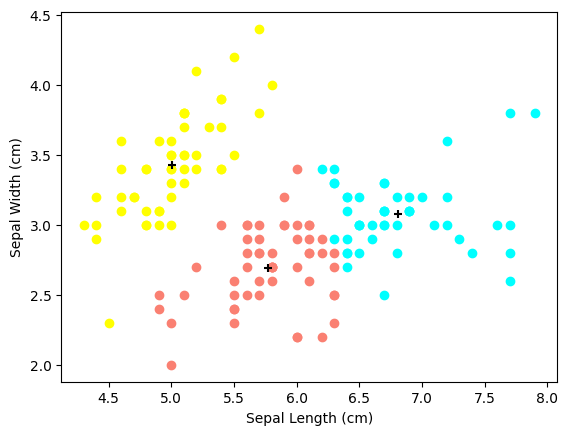

In [33]:
plt.scatter(d0['sepal length (cm)'], d0['sepal width (cm)'], color = 'salmon')
plt.scatter(d1['sepal length (cm)'], d1['sepal width (cm)'], color = 'cyan')
plt.scatter(d2['sepal length (cm)'], d2['sepal width (cm)'], color = 'yellow')
plt.scatter(centers[:, 0], centers[:, 1], color = 'black', marker = '+')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

In [39]:
k_rng = 11
sse = []

for k in range(1, k_rng):
  km = KMeans(n_clusters = k)
  km.fit(df1)
  sse.append(km.inertia_)

In [40]:
sse

[233.4152666666667,
 92.4962,
 37.05070212765956,
 29.819526802984246,
 22.711396103896114,
 17.60416533466534,
 15.546267286276617,
 13.370959677419355,
 12.086069500263877,
 10.806232503607507]

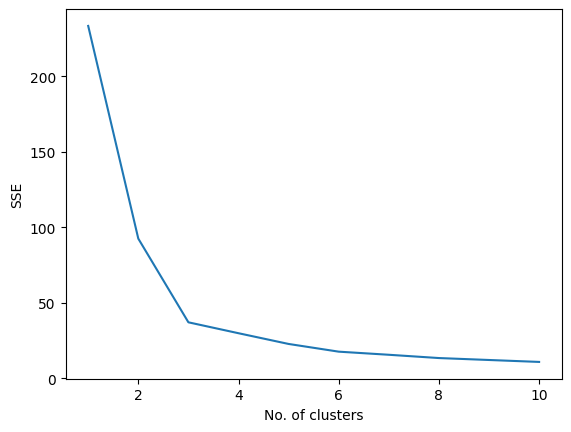

In [41]:
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.plot(range(1, k_rng), sse)